In [10]:
import model
import pre_process
import yfinance as yf
import tensorflow as tf
import numpy as np
from keras.optimizers import SGD, RMSprop, Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [25]:
data = pd.read_csv('~/Desktop/Jordan Belfort/data.csv')

In [26]:
data1 = pre_process.pre_process(data,Moving_window=20)

percentchange = data1['Change'].to_numpy()
percentchange_copy = percentchange
data.drop(['Date','Change'], axis=1, inplace=True)
percentchange = percentchange[1:]
percentchange = np.append(percentchange,0)

for i in range(len(percentchange)):
    if (percentchange[i]>0):
        percentchange[i] = 1
    else:
        percentchange[i] = 0

In [4]:
data_encoded = pd.get_dummies(data1, columns=['Signal_MACD_strength'], dtype = 'float32')
data_encoded['Volume'] = data_encoded['Volume']/100000 
Y = percentchange

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data_encoded[:-1],Y[:-1])
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [9]:
param_grid = [{'C':np.linspace(2000,3000,1000),'gamma':np.linspace(0.001,0.1,100), 'kernel':['rbf'], 'degree': [1]}]
optimal_params = GridSearchCV(SVC(), param_grid, cv =2, scoring='f1',n_jobs=-1, verbose = 1)
optimal_params.fit(X_train_scaled, Y_train)
print(optimal_params.best_params_)
clf_svm = SVC(degree = 1, kernel='rbf', gamma = optimal_params.best_params_['gamma'], C = optimal_params.best_params_['C'], verbose=True)
clf_svm.fit(X_train_scaled, Y_train)
disp=ConfusionMatrixDisplay(confusion_matrix(Y_test, clf_svm.predict(X_test_scaled)))
disp.plot()
plt.show()

Fitting 2 folds for each of 100000 candidates, totalling 200000 fits


KeyboardInterrupt: 

(array([], dtype=int64),)


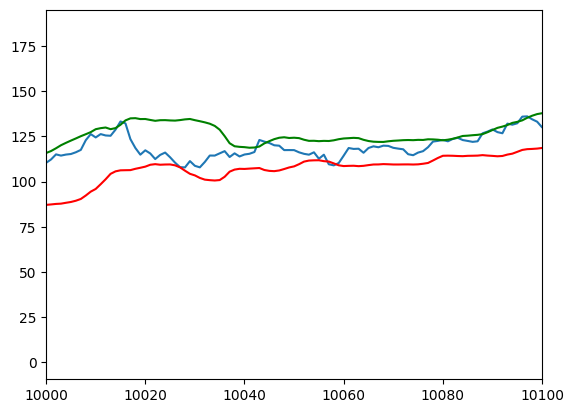

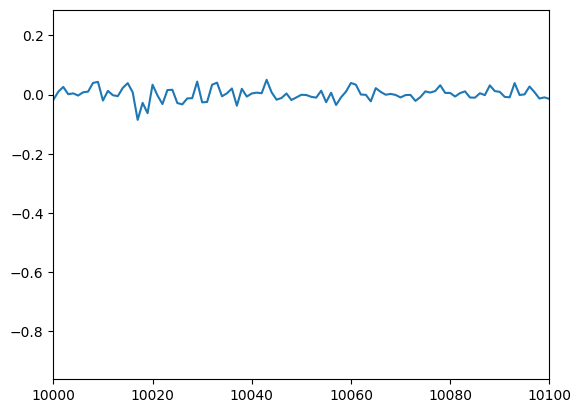

In [31]:
plt.plot(data1['Typical_Price'])
#plt.ylim(-0.1,0.1)
plt.xlim(10000,10100)
plt.plot(data1['BOLu'], c='g')
plt.plot(data1['BOLl'], c='r')
indices_where_squeeze = np.where(data1['Squeeze']==1)
print(indices_where_squeeze)
plt.show()
plt.figure()
plt.plot(percentchange_copy)
plt.xlim(10000,10100)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

0.0

Good minimas: C = 517.6666666666666, gamma = 0.00038888888888888, kernel = rbf
              C = 1858.7777777777778, gamma = 0.0032222222222222222, kernel = rbf